In [1]:
from google.colab import files
uploaded = files.upload()

Saving driver-data.csv to driver-data.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('driver-data.csv')
#used to read csv files and perform operations on it

df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


#HANDLING CATEGORICAL DATA

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
#x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[1487.     71.24]
 [2764.     52.53]
 [3276.     64.54]
 ...
 [2473.    170.91]
 [3182.    176.14]
 [1085.    168.03]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [5]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [7]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.98749687 0.214725  ]
 [0.23030758 0.09547695]
 [0.69667417 0.18929646]
 ...
 [0.00950238 0.12893095]
 [0.5743936  0.24434073]
 [0.48387097 0.14956165]]
[[0.95648912 0.07781219]
 [0.73968492 0.06115061]
 [0.51312828 0.15514459]
 ...
 [0.6364091  0.17743272]
 [0.26056514 0.23138657]
 [0.40185046 0.17171893]]


#GRAPHS

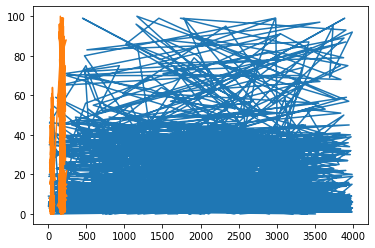

In [8]:
import matplotlib.pyplot as plt 

plt.plot(x, y) 
 

plt.show() 


#ALGORITHM

In [9]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)


#FITTING OF TRAINING DATA

In [10]:
km.fit(x_train,y_train)
#training or fitting the train data into the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [11]:
predictions = km.predict(x_test)

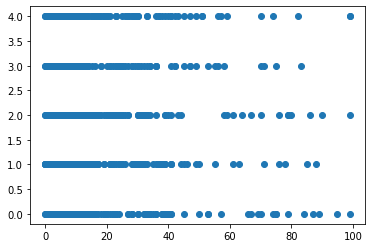

In [12]:
plt.scatter(y_test,predictions)

#EVALUATION

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.629375
MSE: 312.806875
RMSE: 17.686347135573246


In [14]:
print(metrics.accuracy_score(y_test, predictions))

0.054375


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(km) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([0, 4, 2, ..., 4, 1, 1], dtype=int32)

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [16]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:1600]

results =confusion_matrix(y_train, predictions)
print(results)

[[ 3  0  0 ...  0  0  0]
 [ 8  5  6 ...  0  0  0]
 [13 16 18 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Precision, Recall, Support, Fscore

In [17]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.003843447146192551, 0.017023174512985562, 0.005289981890108829, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

results =confusion_matrix(y_test, predictions)
print(results)

[[ 2  5  2 ...  0  0  0]
 [13 12 11 ...  0  0  0]
 [11 10 14 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  1 ...  0  0  0]]


Precision, Recall, Support, Fscore

In [19]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.003352156398842691, 0.01177231780501111, 0.004855644293872308, None)